<a href="https://colab.research.google.com/github/LOGITHNATHAN/Employee-Attrition-Analysis-and-Prediction/blob/main/data_preprocessing_%26_cleaning_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.option_context('mode.use_inf_as_na', True)
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df = pd.read_csv('/content/Employee-Attrition - Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
print(f"There is {df.shape[0]} rows and {df.shape[1]} columns")

There is 1470 rows and 35 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


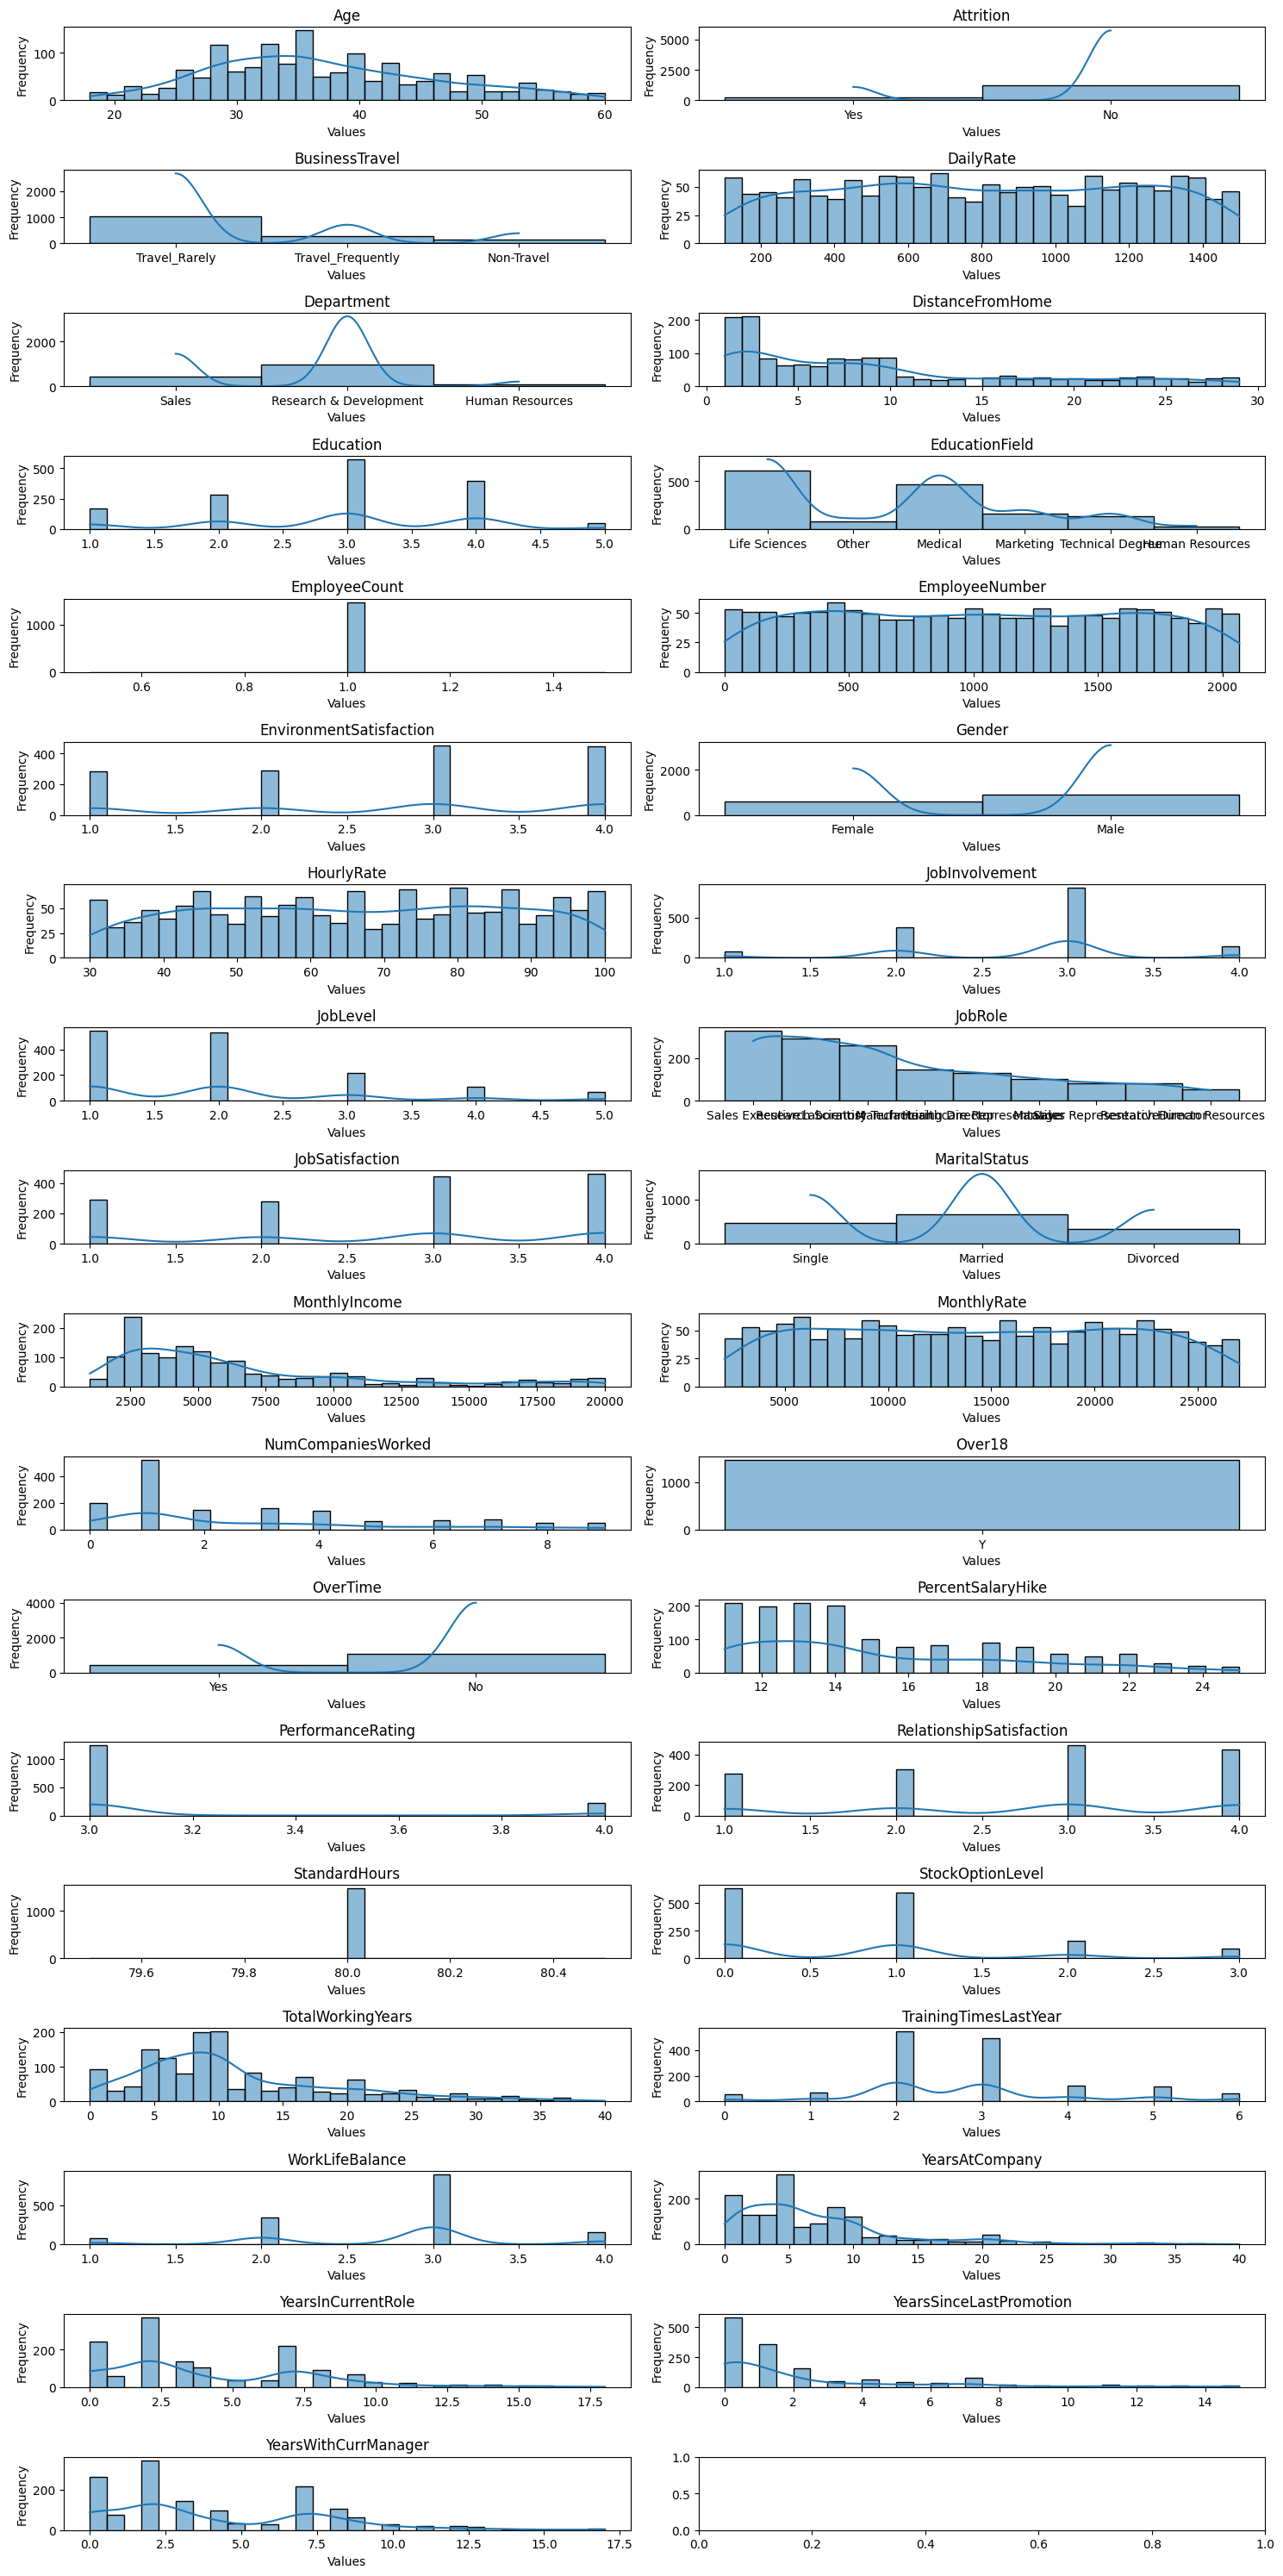

In [8]:
# Set the number of columns per row in the subplot grid
cols_per_row = 2

# Determine the number of rows needed for the subplot grid
num_cols = df.shape[1]
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

# Create a figure and axis object using subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 30))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Iterate over each column and create a histplot
for i, col in enumerate(df.columns):
    sns.histplot(data=df[col], kde=True, bins=30, alpha=0.5, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [9]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [11]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [13]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [14]:
df['Over18'] = df['Over18'].map({'Y':1})

In [15]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df['OverTime'] = df['OverTime'].map({'Yes':1, 'No':0})

In [17]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [18]:
df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})

In [19]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male':1})

In [21]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [22]:
df['Department'] = df['Department'].map({'Sales': 0, 'Research & Development':1, 'Human Resources':2})

In [23]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [24]:
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely':0, 'Travel_Frequently':1, 'Non-Travel':2})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [26]:
one_hot_encoded = pd.get_dummies(df[['EducationField', 'JobRole']], prefix='category')
one_hot_encoded = one_hot_encoded.astype(int)
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

In [27]:
df_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,category_Human Resources,category_Life Sciences,category_Marketing,category_Medical,category_Other,category_Technical Degree,category_Healthcare Representative,category_Human Resources,category_Laboratory Technician,category_Manager,category_Manufacturing Director,category_Research Director,category_Research Scientist,category_Sales Executive,category_Sales Representative
0,41,1,0,1102,0,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,0,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,0,1,279,1,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1,0,1373,1,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,0,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,0,1,1392,1,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,1,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,27,0,0,591,1,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,1,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [28]:
df_encoded.drop(['EducationField', 'JobRole'], axis=1, inplace=True)

In [29]:
df_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,category_Human Resources,category_Life Sciences,category_Marketing,category_Medical,category_Other,category_Technical Degree,category_Healthcare Representative,category_Human Resources,category_Laboratory Technician,category_Manager,category_Manufacturing Director,category_Research Director,category_Research Scientist,category_Sales Executive,category_Sales Representative
0,41,1,0,1102,0,1,2,1,1,2,0,94,3,2,4,0,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1,0,1373,1,2,2,1,4,4,1,92,2,1,3,0,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,3,1,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,27,0,0,591,1,2,1,1,7,1,1,40,3,1,2,1,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [31]:
df_encoded.to_csv('/content/Employee-Attrition - Employee-Attrition.csvv', index=False)